#### 군집
- 데이터셋을 클러스터라는 그룹으로 나누는 작업
- 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 나누는 것이 목표
- 분류와 비슷하게 어느 클러스터에 속하는지 예측

## 3.5.1 k-평균 군집
- 가장 간단하고 널리 사용되는 군집 알고리즘
- 데이터의 어떤 영역을 대표하는 **클러스터 중심**을 찾는다
- 다음 두 단계를 반복
    1. 데이터 포인트를 가장 가까운 영역 중심에 할당
    2. 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정
    3. 위의 두 단계를 반복하다가 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘 종료

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52488 missing from c

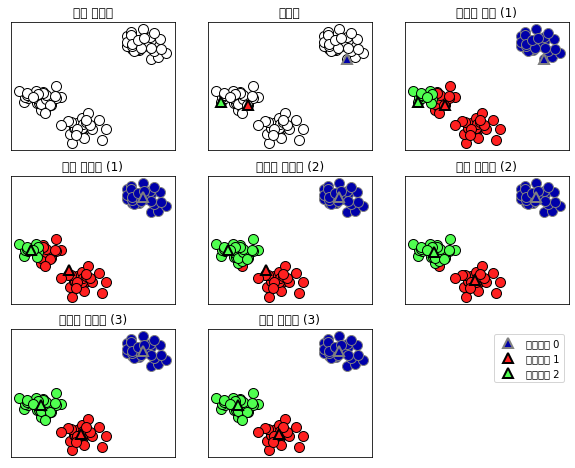

In [2]:
# 예시용 데이터셋에 k-평균 군집을 적용한 예
mglearn.plots.plot_kmeans_algorithm()

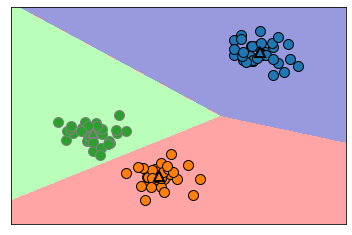

In [3]:
# 위의 그림에서 학습시킨 클러스터 중심의 경계
mglearn.plots.plot_kmeans_boundaries()

In [4]:
# KMeans 객체 생성 후 찾고자 하는 클러스터의 수 지정하기
# 데이터셋은 앞에서 사용한 인위적 데이터셋에 적용
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터 생성
X, y = make_blobs(random_state=1)

# 군집 모델 만들기
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [5]:
print("클러스터 레이블: \n" ,kmeans.labels_)

클러스터 레이블: 
 [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [6]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


군집은 분류와 비슷해보이지만 정답을 모르고 있으며 레이블 자체에 어떤 의미가 있지 않음      
-> 알고리즘이 주는 정보는 같은 레이블인 데이터는 비슷하다는 것

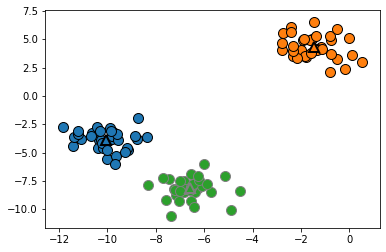

In [7]:
# 그래프 다시 그려보기
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2) # 클러스터 중심을 삼각형으로 표시하기 (cluster_centers_)

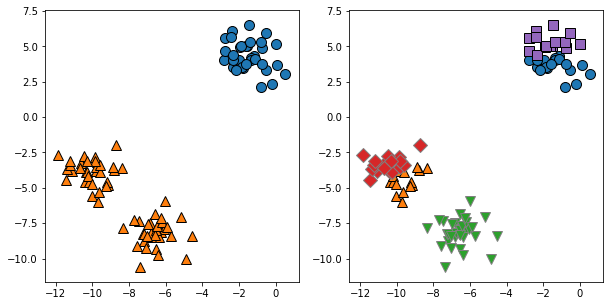

In [8]:
# 클러스터 수를 늘리거나 줄여보기

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### k-평균 알고리즘이 실패하는 경우
- 데이터셋의 클러스터 개수를 정확하게 알고 있더라도 k-평균 알고리즘이 항상 구분해낼 수 있는 것은 아님      
- 각 클러스터를 정의하는 것이 중심 하나뿐이므로 클러스터는 둥근 형태로 나타남 -> 비교적 간단한 형태로 나타낼 수 있음      
- 또한 k-평균은 모든 클러스터 반경이 똑같다고 가정 -> 클러스터 중심 사이의 정확히 중간에 경계를 그림

Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from c

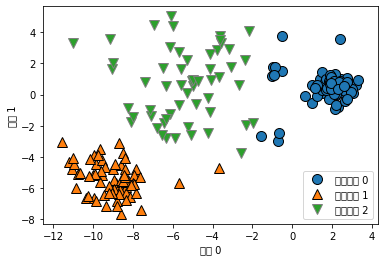

In [9]:
# 클러스터의 밀도가 다를 때 k-평균으로 찾은 클러스터 할당

X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


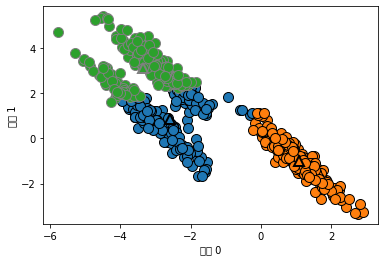

In [10]:
# 원형이 아닌 클러스터를 구분하지 못하는 k-평균 알고리즘 -> k평균은 가장 가까운 클러스터 중심까지의 거리만 고려하기 때문

# 무작위로 클러스터 데이터 생성합니다
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


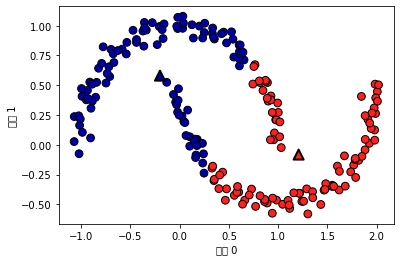

In [11]:
# 복잡한 모양의 클러스터를 구분하지 못하는 k-평균 알고리즘

# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣습니다)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0) # noise : 잡음의 크기, 0이면 정확한 반원

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 벡터 양자화 또는 분해 메서드로서의 k-평균
**벡터 양자화**
- k-평균을 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것

In [17]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

In [18]:
# k-평균의 클러스터 중심과 PCA, NMF로 찾은 성분의 비교


X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, max_iter=1000, tol=1e-2, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

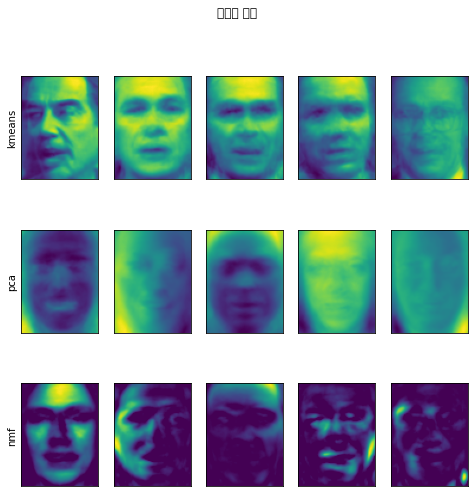

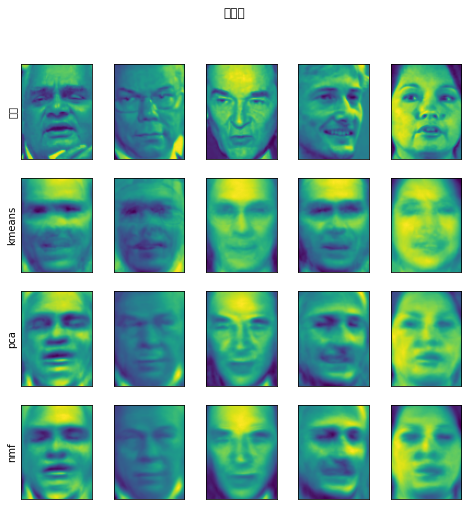

In [21]:
# k-평균의 클러스터 중심과 PCA, NMF로 찾은 성분의 비교

fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
image_shape = people.images[0].shape
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):
    
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

k- 평균을 이용한 벡터 양자화의 흥미로운 면 : 입력 데이터의 차워놉다 더 많은 클러스터를 사용해 데이터를 인코딩 할 수 있음 

클러스터 레이블:
 [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


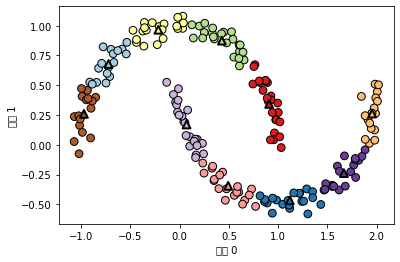

In [22]:
# 복잡한 형태의 데이터셋을 다루기 위해 많은 클러스터를 사용한 k-평균

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0) # 10개의 성분으로 표현
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

위에서 특성 2개만으로는 불가능했지만 10차원 형태를 이용하면 선형 모델을 사용해 두 개의 반달 모양 구문 가능

또한 클러스터 중심까지의 거리를 특성으로 사용하면 데이터를 잘 나타낼 수 있음

In [23]:
# kmeans 모델의 transform 메서드 사용

distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


 ### k-평균 장단점
 **장점**
 - 이해하기 쉽고 구현이 빠름
 - 대용량 데이터셋에서도 잘 작동
 
 
 **단점**
 - 무작위 초기화를 하여 난수 초기값에 따라 알고리즘의 출력이 달라짐
 - 클러스터 모양을 하고 있어 활용 범위가 제한적이며 클러스터의 개수를 지정해야함